# Stock prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import requests

In [2]:
url = f'https://iex.lewagon.com/stable/stock/aapl/chart/3m'
api_data = requests.get(url).json()

In [3]:
type(api_data)

list

In [4]:
pd.DataFrame(api_data)

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,173.00,174.010,169.930,170.91,2023-10-23,AAPL,55980109,HISTORICAL_PRICES,AAPL,,...,169.930,55980109,170.461,172.545,173.553,169.483,55980109,"Oct 23, 23",0.00,0.0000
1,173.44,173.670,171.450,173.05,2023-10-24,AAPL,43816644,HISTORICAL_PRICES,AAPL,,...,171.450,43816644,172.595,172.984,173.213,170.999,43816644,"Oct 24, 23",0.44,0.0025
2,171.10,173.060,170.650,171.88,2023-10-25,AAPL,57156962,HISTORICAL_PRICES,AAPL,,...,170.650,57156962,171.428,170.650,172.605,170.201,57156962,"Oct 25, 23",-2.34,-0.0135
3,166.89,171.378,165.670,170.37,2023-10-26,AAPL,70625258,HISTORICAL_PRICES,AAPL,,...,165.670,70625258,169.922,166.451,170.927,165.234,70625258,"Oct 26, 23",-4.21,-0.0246
4,168.22,168.960,166.830,166.91,2023-10-27,AAPL,58499129,HISTORICAL_PRICES,AAPL,,...,166.830,58499129,166.471,167.778,168.516,166.391,58499129,"Oct 27, 23",1.33,0.0080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,185.92,186.740,185.190,186.06,2024-01-12,AAPL,40477782,HISTORICAL_PRICES,AAPL,,...,185.190,40477782,186.060,185.920,186.740,185.190,40477782,"Jan 12, 24",0.33,0.0018
57,183.63,184.260,180.934,182.16,2024-01-16,AAPL,65603041,HISTORICAL_PRICES,AAPL,,...,180.934,65603041,182.160,183.630,184.260,180.934,65603041,"Jan 16, 24",-2.29,-0.0123
58,182.68,182.930,180.300,181.27,2024-01-17,AAPL,47317433,HISTORICAL_PRICES,AAPL,,...,180.300,47317433,181.270,182.680,182.930,180.300,47317433,"Jan 17, 24",-0.95,-0.0052
59,188.63,189.140,185.830,186.09,2024-01-18,AAPL,78005754,HISTORICAL_PRICES,AAPL,,...,185.830,78005754,186.090,188.630,189.140,185.830,78005754,"Jan 18, 24",5.95,0.0326


In [5]:
def fix_datetime_on_dataframe(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(keys='date', inplace=True)

In [6]:
def create_stock_df_of_company(company_code):
    url = f'https://iex.lewagon.com/stable/stock/{company_code}/chart/3m'
    df = pd.read_json(url)
    fix_datetime_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [7]:
apple_df = create_stock_df_of_company('aapl')
apple_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,company_code
date,,,,,,,,,,,,,,,,,,,,,
2023-10-23,173.00,174.010,169.93,170.91,2023-10-23,AAPL,55980109,HISTORICAL_PRICES,AAPL,,...,55980109,170.461,172.545,173.553,169.483,55980109,"Oct 23, 23",0.00,0.0000,aapl
2023-10-24,173.44,173.670,171.45,173.05,2023-10-24,AAPL,43816644,HISTORICAL_PRICES,AAPL,,...,43816644,172.595,172.984,173.213,170.999,43816644,"Oct 24, 23",0.44,0.0025,aapl
2023-10-25,171.10,173.060,170.65,171.88,2023-10-25,AAPL,57156962,HISTORICAL_PRICES,AAPL,,...,57156962,171.428,170.650,172.605,170.201,57156962,"Oct 25, 23",-2.34,-0.0135,aapl
2023-10-26,166.89,171.378,165.67,170.37,2023-10-26,AAPL,70625258,HISTORICAL_PRICES,AAPL,,...,70625258,169.922,166.451,170.927,165.234,70625258,"Oct 26, 23",-4.21,-0.0246,aapl
2023-10-27,168.22,168.960,166.83,166.91,2023-10-27,AAPL,58499129,HISTORICAL_PRICES,AAPL,,...,58499129,166.471,167.778,168.516,166.391,58499129,"Oct 27, 23",1.33,0.0080,aapl


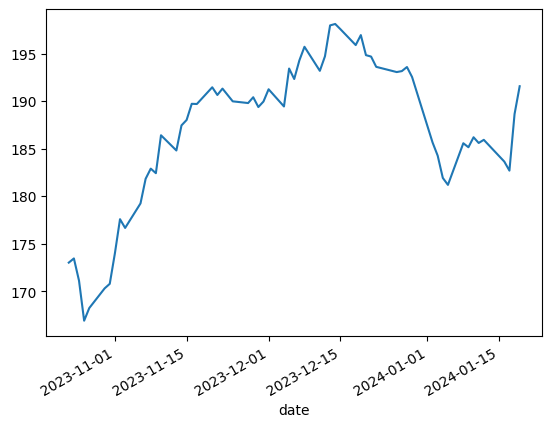

In [8]:
apple_df['close'].plot(kind='line');

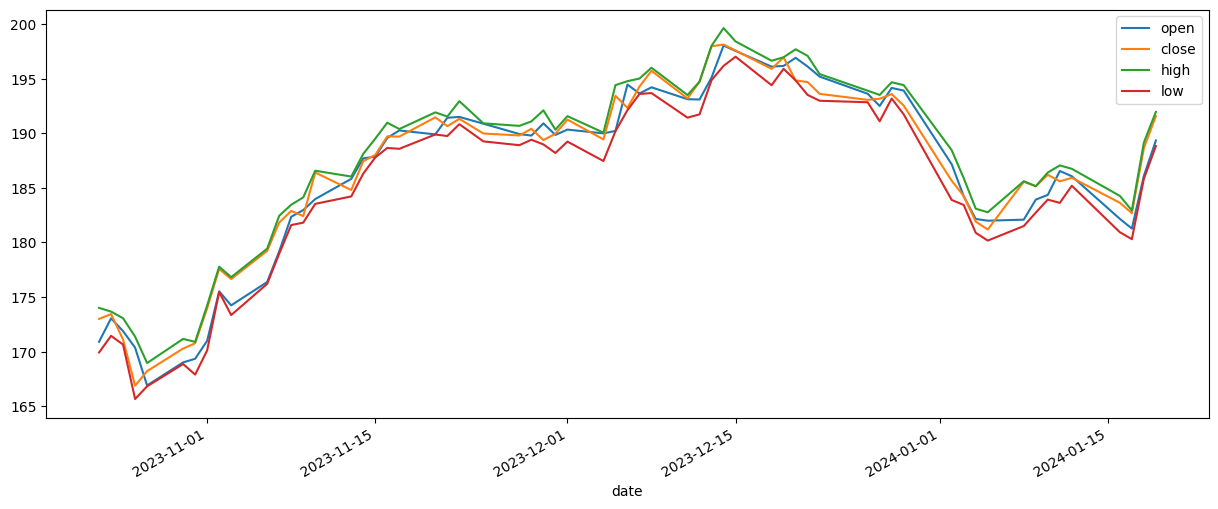

In [9]:
apple_df[['open', 'close', 'high', 'low']].plot(kind='line', figsize=(15,6));

In [10]:
apple_df.columns

Index(['close', 'high', 'low', 'open', 'priceDate', 'symbol', 'volume', 'id',
       'key', 'subkey', 'updated', 'changeOverTime', 'marketChangeOverTime',
       'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose',
       'fHigh', 'fLow', 'fVolume', 'label', 'change', 'changePercent',
       'company_code'],
      dtype='object')

In [11]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-stock-market-api/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.67s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



In [12]:
codes = ['amzn', 'googl', 'meta']
stock_dfs = [apple_df]
for code in codes:
    stock_dfs.append(create_stock_df_of_company(code))

In [13]:
stocks_df = pd.concat(stock_dfs)
stocks_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,company_code
date,,,,,,,,,,,,,,,,,,,,,
2023-10-23,173.00,174.010,169.93,170.91,2023-10-23,AAPL,55980109,HISTORICAL_PRICES,AAPL,,...,55980109,170.461,172.545,173.553,169.483,55980109,"Oct 23, 23",0.00,0.0000,aapl
2023-10-24,173.44,173.670,171.45,173.05,2023-10-24,AAPL,43816644,HISTORICAL_PRICES,AAPL,,...,43816644,172.595,172.984,173.213,170.999,43816644,"Oct 24, 23",0.44,0.0025,aapl
2023-10-25,171.10,173.060,170.65,171.88,2023-10-25,AAPL,57156962,HISTORICAL_PRICES,AAPL,,...,57156962,171.428,170.650,172.605,170.201,57156962,"Oct 25, 23",-2.34,-0.0135,aapl
2023-10-26,166.89,171.378,165.67,170.37,2023-10-26,AAPL,70625258,HISTORICAL_PRICES,AAPL,,...,70625258,169.922,166.451,170.927,165.234,70625258,"Oct 26, 23",-4.21,-0.0246,aapl
2023-10-27,168.22,168.960,166.83,166.91,2023-10-27,AAPL,58499129,HISTORICAL_PRICES,AAPL,,...,58499129,166.471,167.778,168.516,166.391,58499129,"Oct 27, 23",1.33,0.0080,aapl


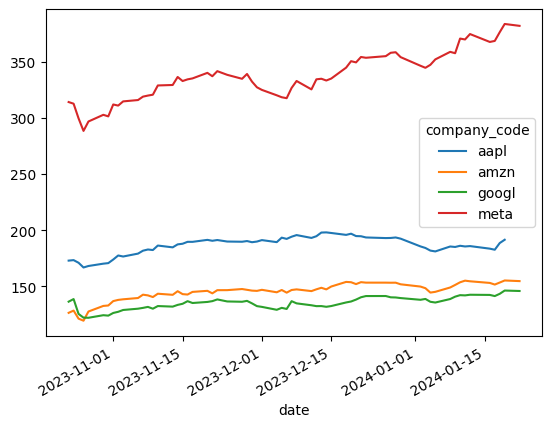

In [14]:
# Pivot the table to get company_code as columns
pivot_df = stocks_df.pivot(columns='company_code', values='close')
pivot_df.plot(kind='line');

In [15]:
def normalize(series):
    return series/series[0]

normalized_pivot = pivot_df.apply(normalize, axis=0)

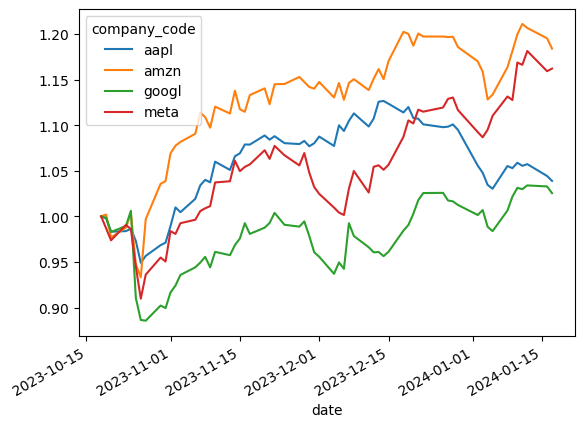

In [31]:
normalized_pivot.plot(kind='line');